##### John Franklin Crenshaw

.

Physics 566 Problem Set 5

March 8, 2019

In [135]:
import numpy as np
from numpy.fft import rfft, irfft, rfft2, irfft2
from numpy import pi
import matplotlib.pyplot as plt

In [2]:
# Plot aesthetics
plt.style.use('jfc') # a style sheet I have defined on my computer
%config InlineBackend.figure_format = 'retina'

***
#### (1) CP 7.1
###### *Fourier transform of simple functions*

I will use the fast fourier transform in numpy to calculate the fourier transforms of:

1. A single cycle of a square-wave with amplitude 1
2. The sawtooth wave $y_n = n$
3. The modulated sine wave $y_n = \sin{(\pi n/N)} \sin{(20\pi n/N)}$

In [3]:
# First, the square wave
def square_wave(x):
    """Square wave of period 2pi and magnitude 1"""
    phase = x % (2*pi)
    y = 1 - 2*(phase//pi)
    return y

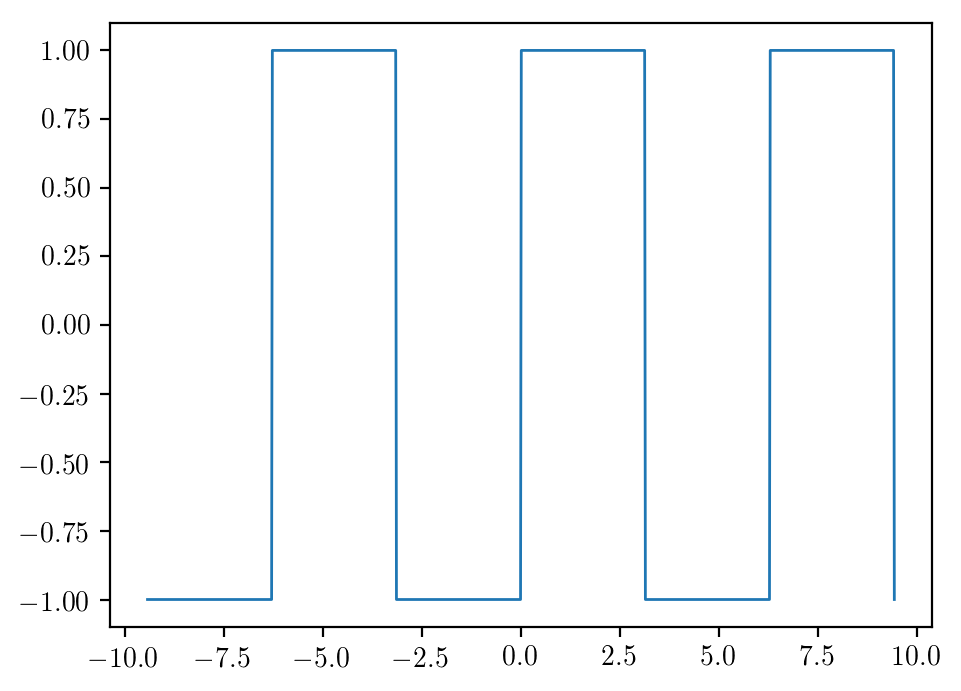

In [4]:
# visualize the square wave
x = np.linspace(-3*pi,3*pi,1000)
y = square_wave(x)
plt.plot(x,y)
plt.show()

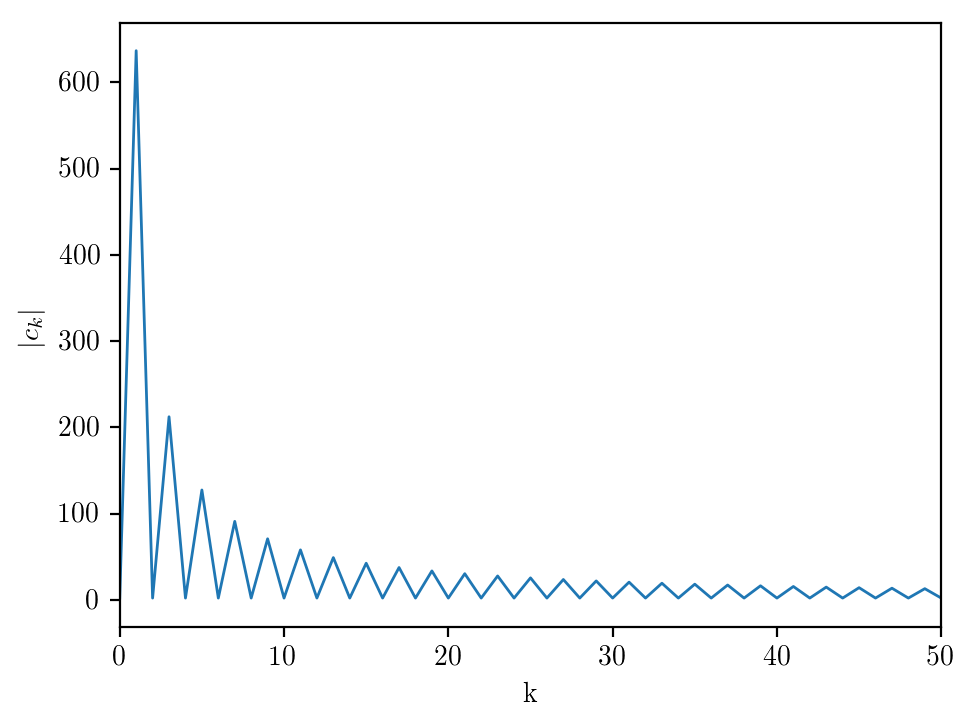

In [8]:
# fourier transform of one cycle of square wave
x = np.linspace(0,2*pi,1000)
y = square_wave(x)
c = rfft(y)

# plot magnitudes of result
x = np.arange(0,501)
amp = abs(c)
plt.plot(x,amp)

plt.xlabel('k')
plt.ylabel('$|c_k|$')
plt.xlim(0,50)

plt.show()

In [9]:
# Now, the sawtooth wave
def sawtooth(x):
    """Sawtooth wave of period 2pi and magnitude pi"""
    y = (x-pi) % (2*pi) - pi
    return y

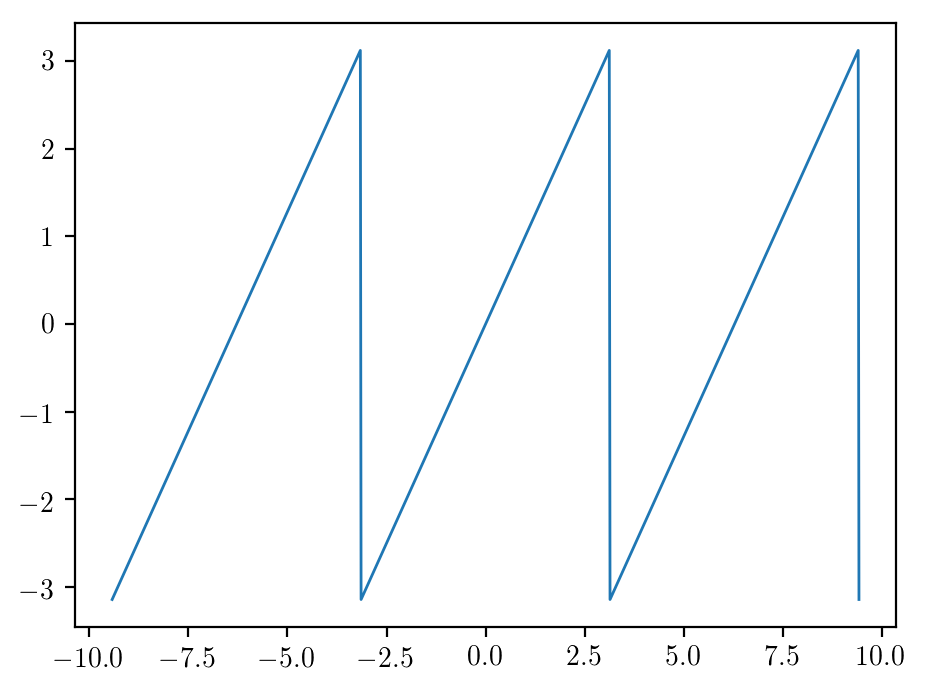

In [10]:
# visualize the sawtooth wave
x = np.linspace(-3*pi,3*pi,1000)
y = sawtooth(x)
plt.plot(x,y)
plt.show()

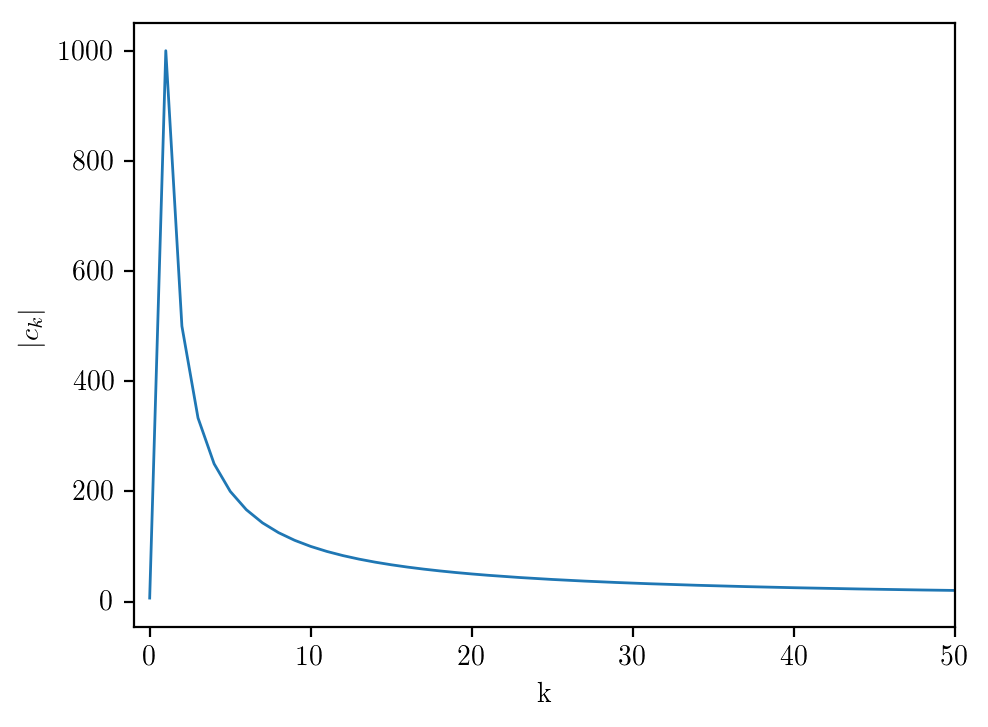

In [11]:
# fourier transform of one cycle of the sawtooth wave
x = np.linspace(-pi,pi,1000)
y = sawtooth(x)
c = rfft(y)

# plot magnitudes of result
x = np.arange(0,501)
amp = abs(c)
plt.plot(x,amp)

plt.xlabel('k')
plt.ylabel('$|c_k|$')
plt.xlim(-1,50)

plt.show()

In [12]:
# Finally, the modulated sine wave
def modsine(x):
    """Modulated sine wave"""
    return np.sin(pi/1e3*x)*np.sin(20*pi/1e3*x)

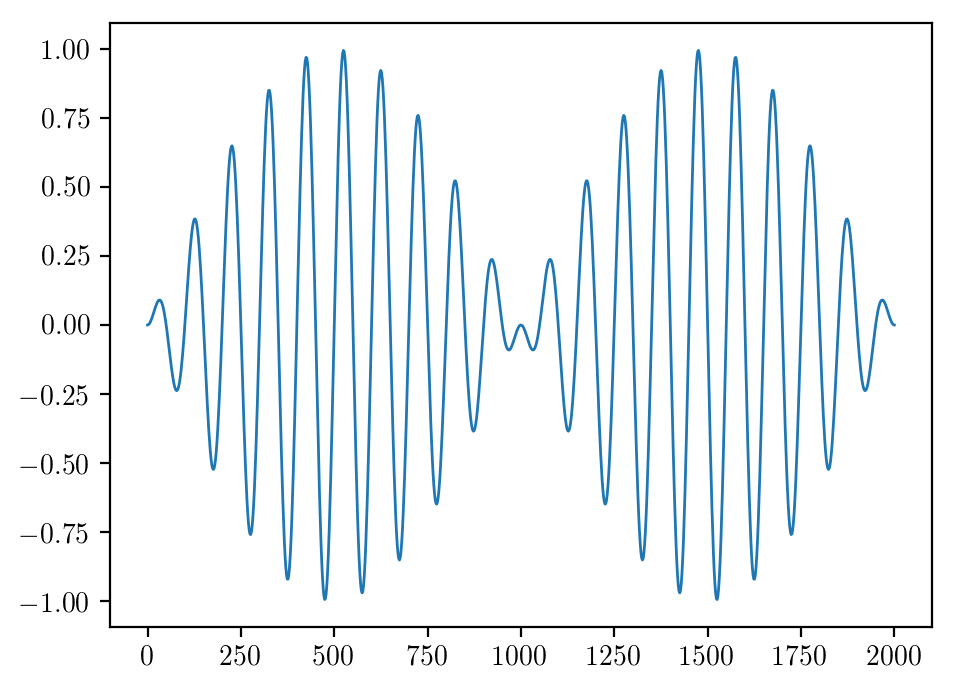

In [13]:
# visualize the modulated sine wave
x = np.linspace(0,2000,1000)
y = modsine(x)
plt.plot(x,y)
plt.show()

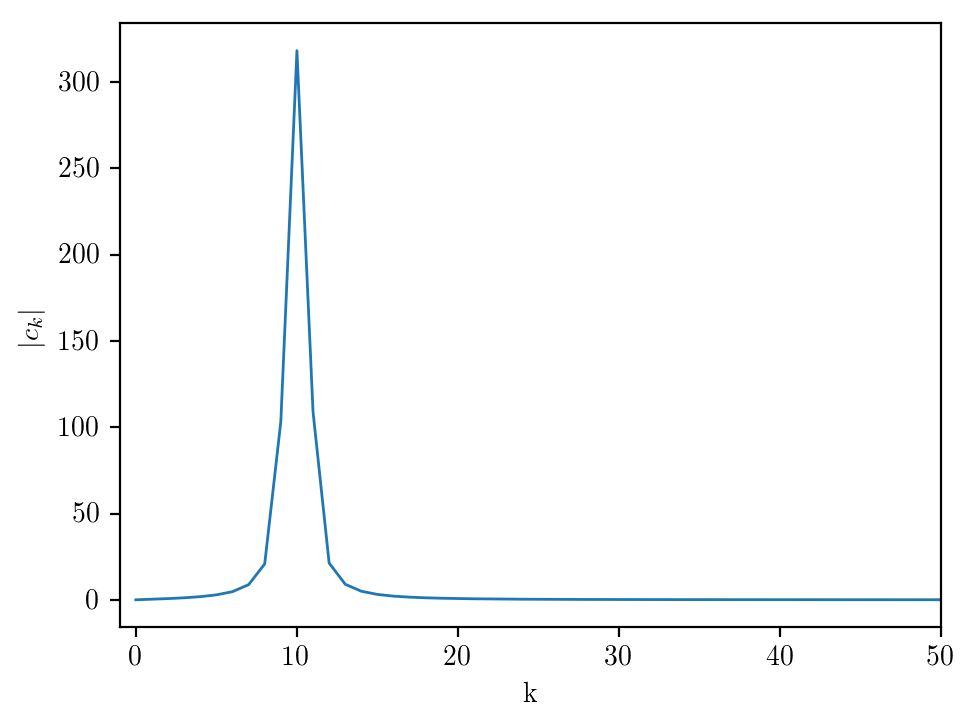

In [14]:
# fourier transform of one cycle of the modulated sine wave
x = np.linspace(0,1000,1000)
y = modsine(x)
c = rfft(y)

# plot magnitudes of result
x = np.arange(0,501)
amp = abs(c)
plt.plot(x,amp)

plt.xlabel('k')
plt.ylabel('$|c_k|$')
plt.xlim(-1,50)

plt.show()

***
#### (2) CP 7.2
###### *Detecting periodicity in sunspots*

You can take the fourier transform of data and look at the amplitude of the modes to determine whether data is periodic, and if so, what that period is. I do this here with sunspot data.

In [15]:
# load data
month,spots = np.loadtxt('./data/sunspots.txt',unpack=True)

First I plot the first 500 months

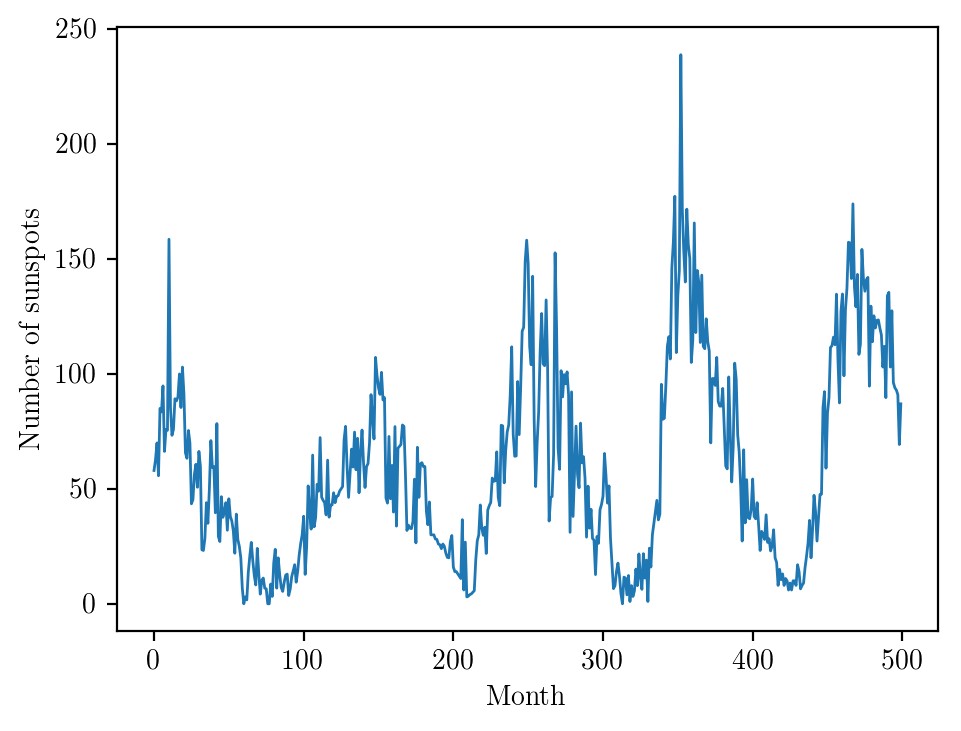

In [16]:
# plot the first 500 months
plt.plot(month[:500],spots[:500])
plt.xlabel("Month")
plt.ylabel("Number of sunspots")
plt.show()

It looks like the number of sunspots is period with a period $\approx 120$ months.

Now I will take the Fourier transforms to calculate the period.

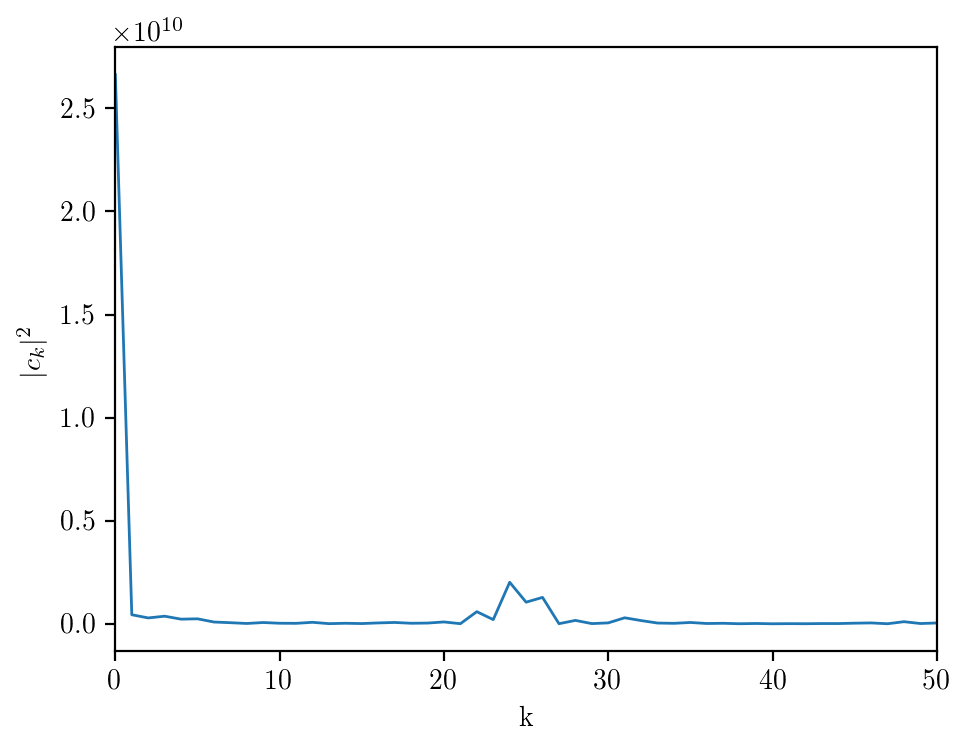

In [17]:
c = rfft(spots)

x = np.arange(0,len(c))
amp = abs(c)**2
plt.plot(x,amp)

plt.xlabel('k')
plt.ylabel('$|c_k|^2$')
plt.xlim(0,50)

plt.show()

There is a spike in the Fourier coefficiencts between $k = 20$ and $k = 30$. I will zoom in for better accuracy.

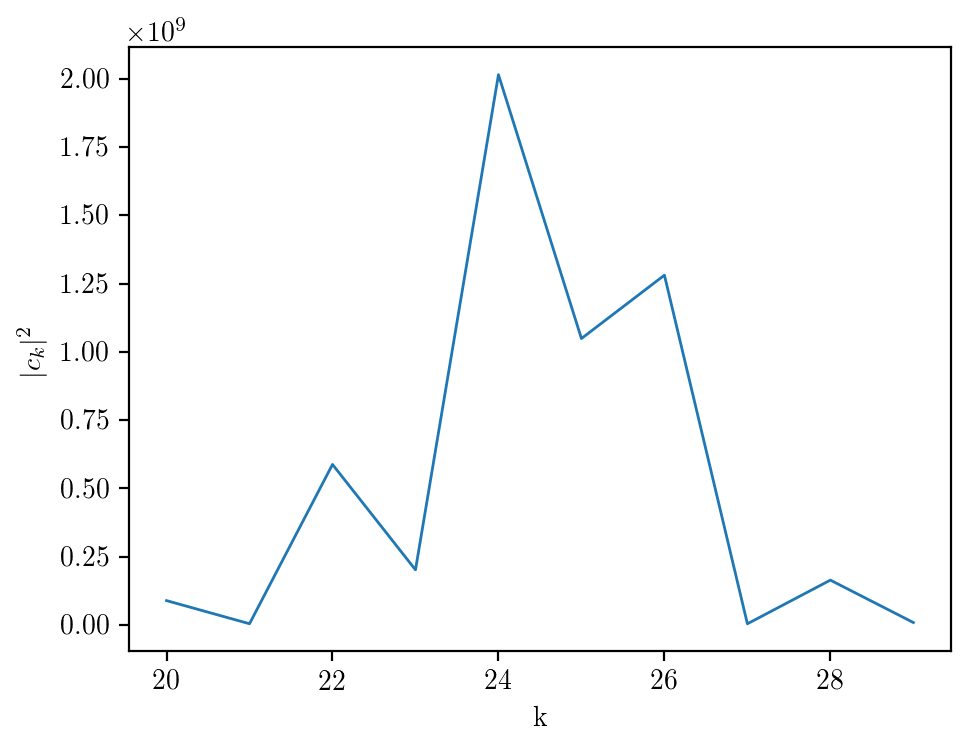

In [18]:
plt.plot(x[20:30],amp[20:30])

plt.xlabel('k')
plt.ylabel('$|c_k|^2$')

plt.show()

It looks like the peak is at $k = 24$. Since the discrete Fourier transform is
$$ c_k = \sum_{n=0}^{N-1} y_n e^{-i\frac{2\pi k}{N}n}, $$
the period is
$$ T = \frac{N}{k}. $$
For our data set, $N = 3143$, so the solar cycle is 
$$ T = \frac{3143}{24} \approx 131 \text{ months} \approx 11 \text{ years,}$$
in good agreement with my initial estimate of 120 months. According to Wikipedia, the solar cycle is approximately 11 years, in perfect agreement with my result.

***
#### (3) CP 7.3
###### *Fourier transform of musical instruments*

Fourier transforms can be used to analyze the sound of musical instruments and to determine what fundamental frequency they are playing. I do this for a piano and a trumpet.

In [19]:
# load the data

amp_piano = np.loadtxt('./data/piano.txt')
t_piano = len(amp_piano)/44100
t_piano = np.linspace(0,t_piano,len(amp_piano))

amp_trumpet = np.loadtxt('./data/trumpet.txt')
t_trumpet = len(amp_trumpet)/44100
t_trumpet = np.linspace(0,t_trumpet,len(amp_trumpet))

First I will plot the waveform and Fourier transform of the piano recording.

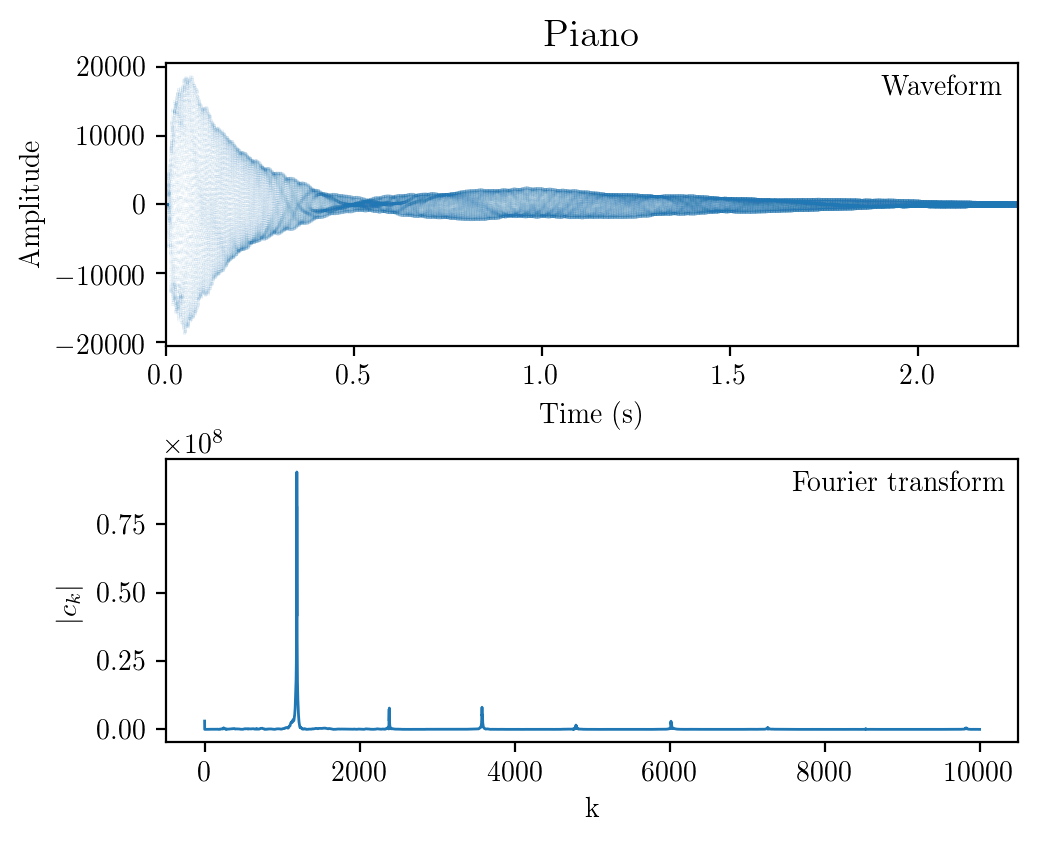

In [30]:
fig1, (ax11,ax12) = plt.subplots(2,1,figsize=(5.5,4.5))
plt.subplots_adjust(hspace = 0.4)
ax11.set_title("Piano",fontsize=14)

# the waveform
ax11.scatter(t_piano,amp_piano,marker='o',s=0.0001)
ax11.set_xlim(0,max(t_piano))
ax11.set_xlabel("Time (s)")
ax11.set_ylabel("Amplitude")
ax11.text(0.91,0.91,"Waveform",ha='center',va='center',
                              transform = ax11.transAxes)

# the fourier transform
c_piano = rfft(amp_piano)
x = np.arange(0,len(c_piano))
ax12.plot(x[:10000],abs(c_piano[:10000]))
ax12.set_xlabel('k')
ax12.set_ylabel('$|c_k|$')
ax12.text(0.86,0.91,"Fourier transform",ha='center',va='center',
                                  transform = ax12.transAxes)

plt.show()

You can see that the piano recording is primarily one frequency, with some slight overtones.

Now I will plot the waveform and Fourier transform of the trumpet recording.

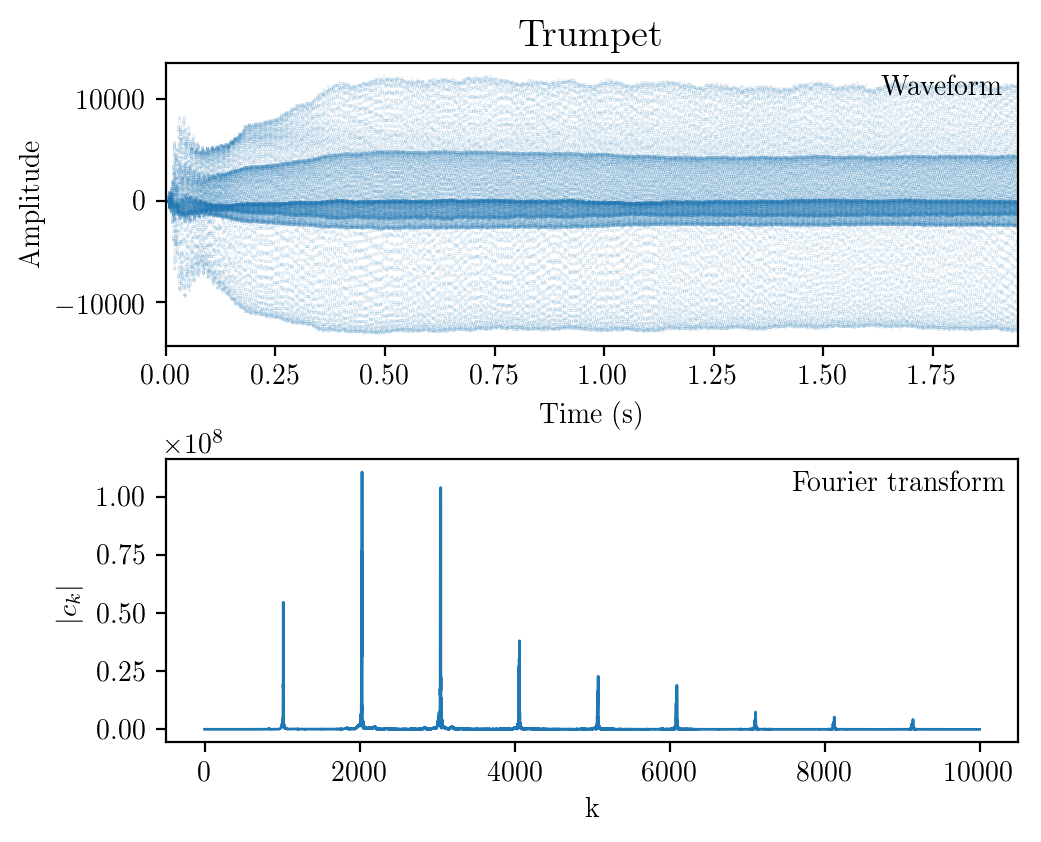

In [28]:
fig2, (ax21,ax22) = plt.subplots(2,1,figsize=(5.5,4.5))
plt.subplots_adjust(hspace = 0.4)
ax21.set_title("Trumpet",fontsize=14)

# the waveform
ax21.scatter(t_trumpet,amp_trumpet,marker='o',s=0.001)
ax21.set_xlim(0,max(t_trumpet))
ax21.set_xlabel("Time (s)")
ax21.set_ylabel("Amplitude")
ax21.text(0.91,0.91,"Waveform",ha='center',va='center',
                              transform = ax21.transAxes)

# the fourier transform
c_trumpet = rfft(amp_trumpet)
x = np.arange(0,len(c_trumpet))
ax22.plot(x[:10000],abs(c_trumpet[:10000]))
ax22.set_xlabel('k')
ax22.set_ylabel('$|c_k|$')
ax22.text(0.86,0.91,"Fourier transform",ha='center',va='center',
                                transform = ax22.transAxes)

plt.show()

You can see that the trumpet recording has more than one frequency with a large amplitude.

In order to determine what note the instruments are playing, I calculate the frequency corresponding to the first k with a large amplitude.

In [31]:
sample_rate = 44100 

# calculate the frequency that the piano was playing
k = np.argmax(abs(c_piano))
f_piano = k / len(amp_piano) * sample_rate
print("Piano freq. = {0:<.0f}".format(f_piano))

# calculate the frequency that the piano was playing
k = np.argmax(abs(c_trumpet[:1500]))
f_trumpet = k / len(amp_trumpet) * sample_rate
print("Trumpet freq. = {0:<.0f}".format(f_trumpet))

Piano freq. = 525
Trumpet freq. = 522


Both instruments are playing a frequency about twice that of Middle C, so they are probably playing Treble C.

***
#### (4) CP 7.4
###### *Smoothing with Fourier transforms*

You can smooth data by taking a Fourier transform, setting high frequency modes equal to zero, then taking the inverse Fourier transform. I do this here with the daily closing values for the Dow Jones Industrial Average.

In [32]:
# load the data
dow = np.loadtxt('./data/dow.txt')

First I plot the daily closing values of the Dow

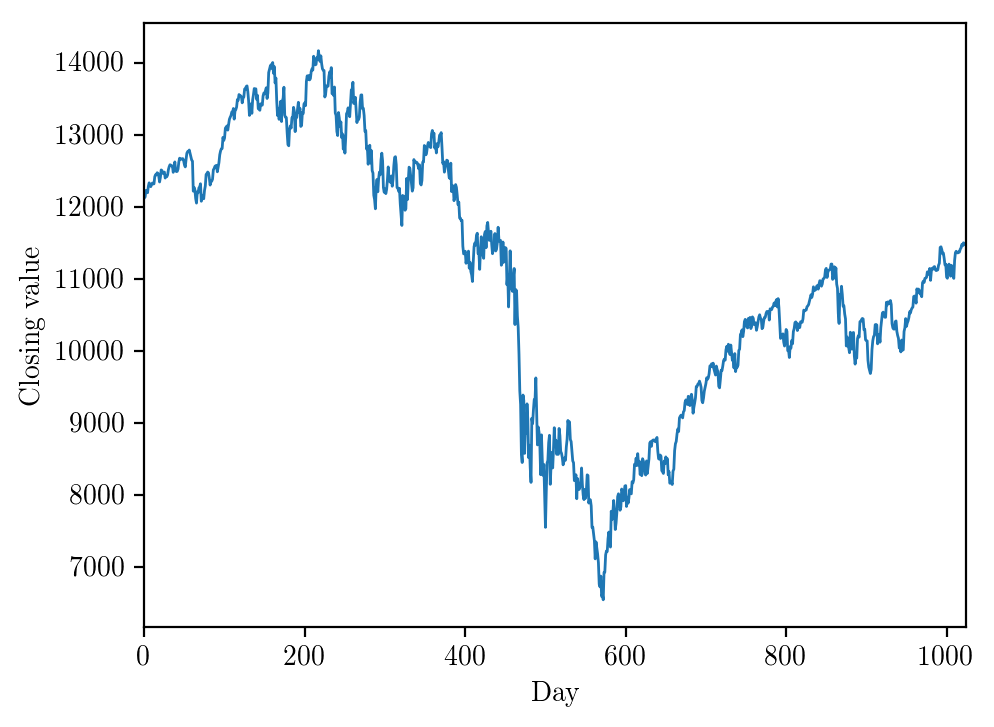

In [68]:
# plot the values
plt.plot(np.arange(0,len(dow)),dow)
plt.xlabel("Day")
plt.ylabel("Closing value")
plt.xlim(0,len(dow))
plt.show()

Now I will smooth the data by taking the Fourier transform, setting high frequency modes to zero, then taking the inverse Fourier transform.

In [61]:
# Smoothing!
# fourier transform
c = rfft(dow)
# set the last 90% to zero
cut = int(0.10*len(c))
c[cut:] = 0
# inverse fourier transform
dow_smoothed = irfft(c)

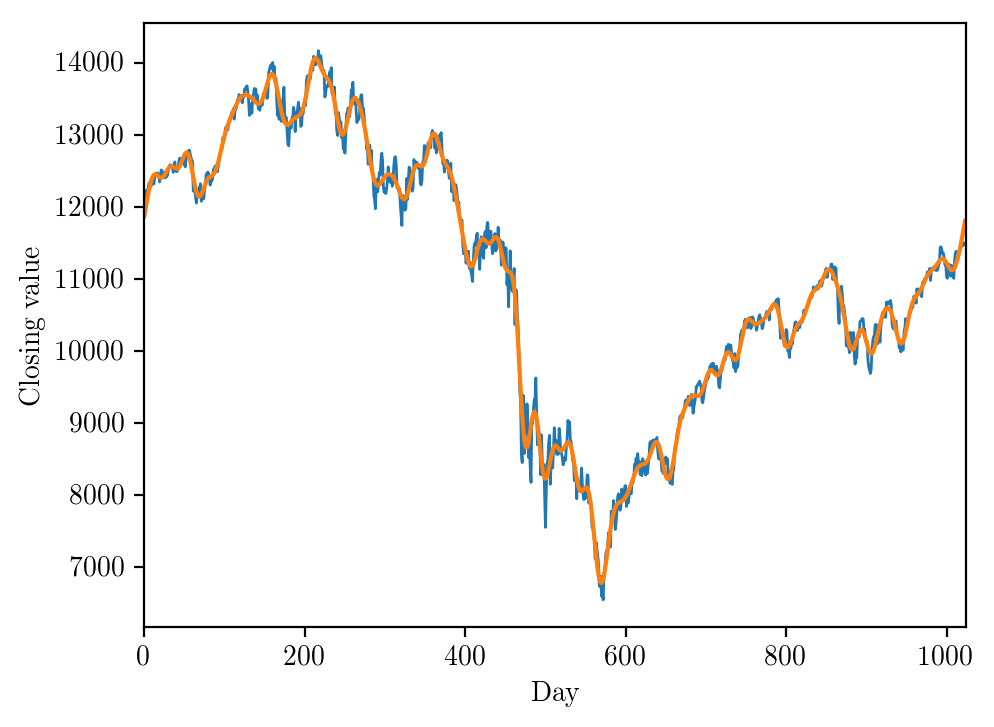

In [65]:
# plot the daily closing values of the Dow
# WITH the smoothed data
plt.plot(np.arange(0,len(dow)),dow)
plt.plot(np.arange(0,len(dow)),dow_smoothed,linewidth=1.5)
plt.xlabel("Day")
plt.ylabel("Closing value")
plt.xlim(0,len(dow))
plt.show()

Setting the last 90% of the coefficients equal to zero smooths the data, as it throws out the high frequency components of the data.

We can smooth the data even more by setting the last 98% of the coefficients equal to zero:

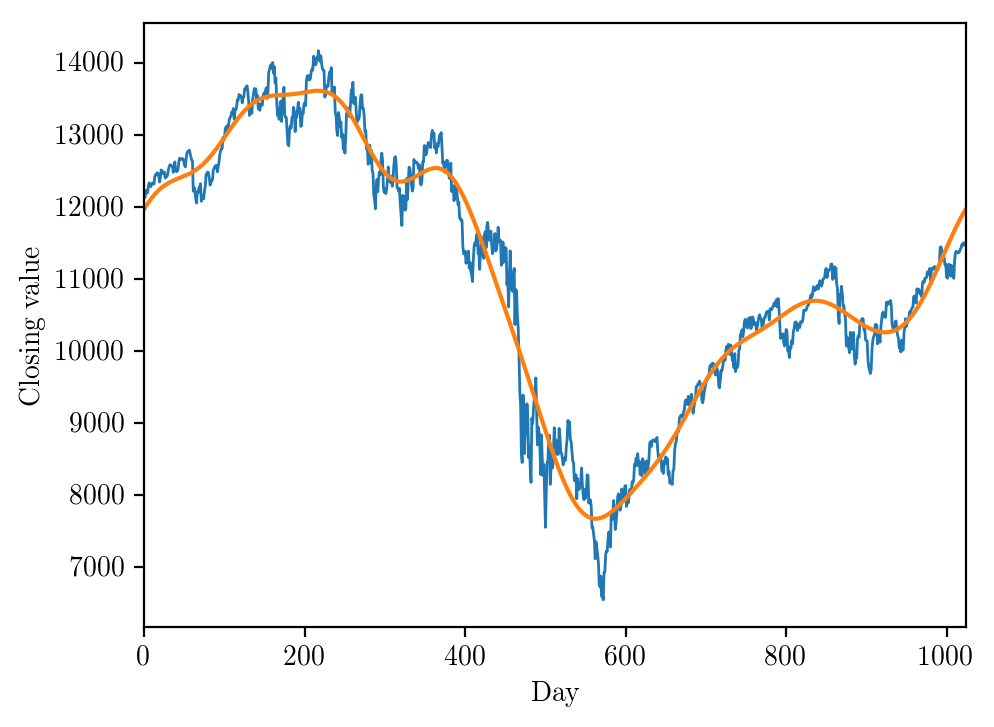

In [67]:
# Smoothing!
# fourier transform
c = rfft(dow)
# set the last 90% to zero
cut = int(0.02*len(c))
c[cut:] = 0
# inverse fourier transform
dow_smoothed = irfft(c)

# plot the daily closing values of the Dow
# WITH the smoothed data
plt.plot(np.arange(0,len(dow)),dow)
plt.plot(np.arange(0,len(dow)),dow_smoothed,linewidth=1.5)
plt.xlabel("Day")
plt.ylabel("Closing value")
plt.xlim(0,len(dow))
plt.show()

***
#### (5) CP 7.5
###### *Artifacts*

Sometime when you remove higher frequencies, you get artifacts. This is demonstrated below with a square wave.

First define the function:

In [69]:
def square_wave2(x):
    """Square wave of period 1 and magnitude 1"""
    phase = x % 1
    y = 1 - 2*(phase//0.5)
    return y

Now plot the function, along with a smoothed version.

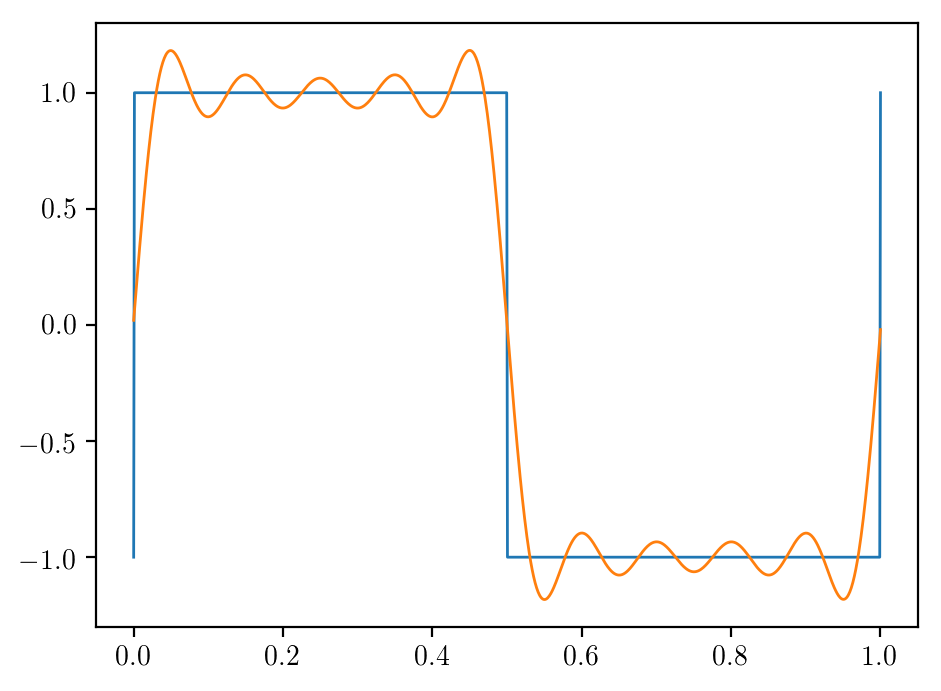

In [96]:
# First the true function
x = np.linspace(-1e-6,1,1000)
y = square_wave2(x)

# Now the Fourier transform
c = rfft(y)
# set all but the first 10 coeffs to zero
c[10:] = 0
# inverse Fourier transform
y2 = irfft(c)

# plot the original function with the inverse
plt.plot(x,y)
plt.plot(x,y2)

plt.show()

There are artifacts (wiggles) in the smoothed function. This is because the tops of a square wave are sharp edges, and you need high frequency components to create sharp edges. These artifacts are inevitable when you try to compress the data by removing high frequency modes.

***
#### (6) CP 7.9
###### *Image deconvolution*

Photos are never perfect representations of their subjects, as the image is blurred on the focal plane. This effect can be undone via Fourier transformation. The blurring of a photo is modeled by a point spread function (PSF), which is convolved with the true image:
$$ b(x,y) = \int_0^K \int_0^L a(x',y') f(x-x',y-y')dx' dy', $$
where $a(x,y)$ is the true intensity, $f$ is the PSF, and $b(x,y)$ is the blurred intensity as recorded in the image.

According to the convolution theorem,
$$ \tilde{b}_{kl} = K L \tilde{a}_{kl} \tilde{f}_{kl}, $$
where a tilde denotes a Fourier transform. One can then (approximately) recover the true image, if the PSF is known, by performing the inverse Fourier transform on 
$$ \tilde{a}_{kl} = \frac{\tilde{b}_{kl}}{K L \tilde{f}_{kl}}. $$
I use this method below to deblur the image of a house.

First, load the image and display it:

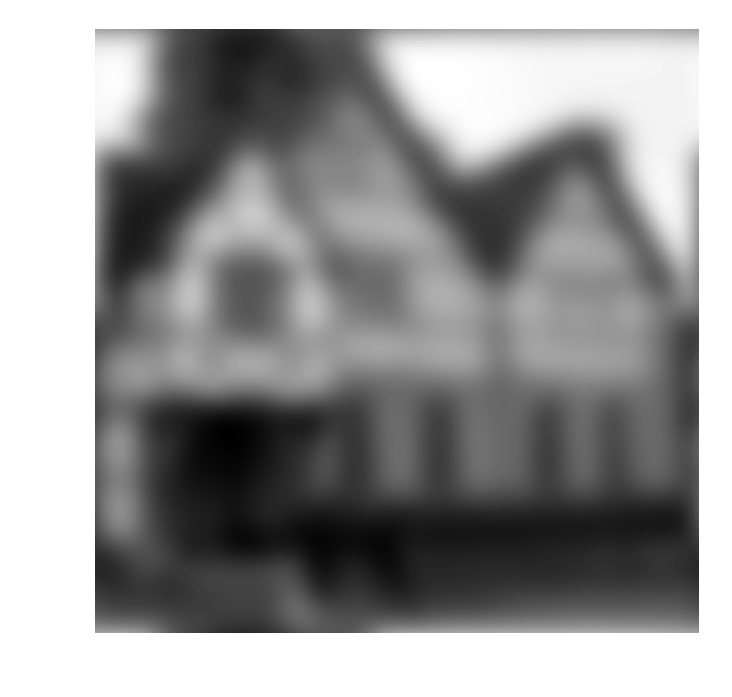

In [201]:
# load data
image = np.loadtxt('./data/blur.txt')

# display image
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

Obviously, it is very blurry.

Now I create the PSF, which is a Gaussian distribution of $\sigma = 25$.

In [173]:
# Gaussian function
def gaussian(x):
    """Normalized Gaussian with sigma = 25"""
    sigma = 25
    y = 1/(sigma*np.sqrt(2*pi))*np.exp(-1/2*x**2/sigma**2)
    return y

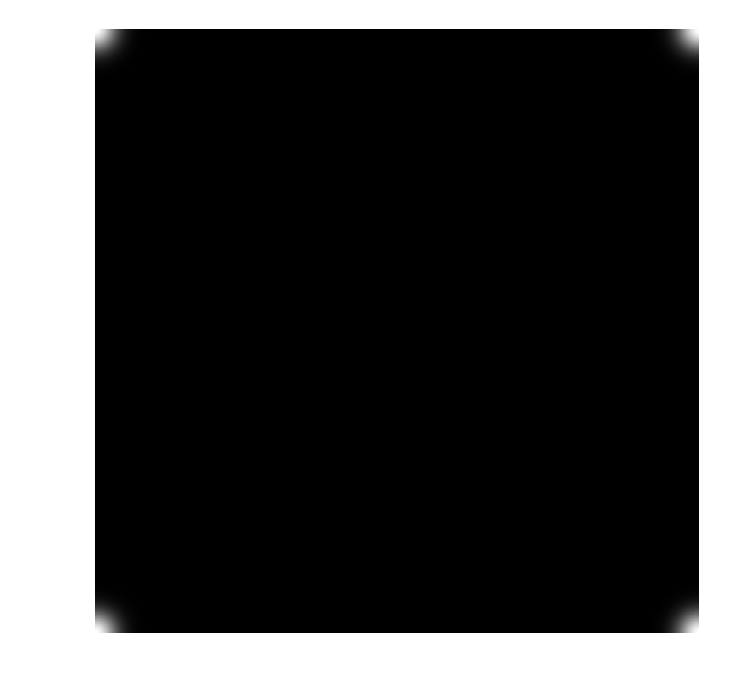

In [176]:
# create the psf
psf = np.zeros(image.shape)

L = int(psf.shape[0]/2)
for i in range(-L,L):
    for j in range(-L,L):
        psf[i,j] = gaussian(i)*gaussian(j)

plt.imshow(psf,cmap='gray')
plt.axis('off')
plt.show()

Notice that the Gaussian is split into the 4 corners, rather than centered in the middle. That is because in array indexing, (0,0) is the top left instead of the center.

Now I take the Fourier transform of the image and the PSF:

In [167]:
c_image = rfft2(image)
c_psf = rfft2(psf)

# multiply the Fourier trans. of the PSF by L^2 because
# we need to divide by L^2 as well (see the formulae above)
c_psf *= L**2
# When we divide, we want to ignore any PSF entries below 1e-3
# because we want to avoid divergences
c_psf[c_psf < 1e-3] = 1

Now deconvolve via dividing by the Fourier transform of the PSF (times $L^2$). Then recreate the image by taking the inverse Fourier transform of the resulting coefficients.

In [177]:
c_deblurred = c_image/c_psf
image_deblurred = irfft2(c_deblurred)

Finally, display the de-blurred image!

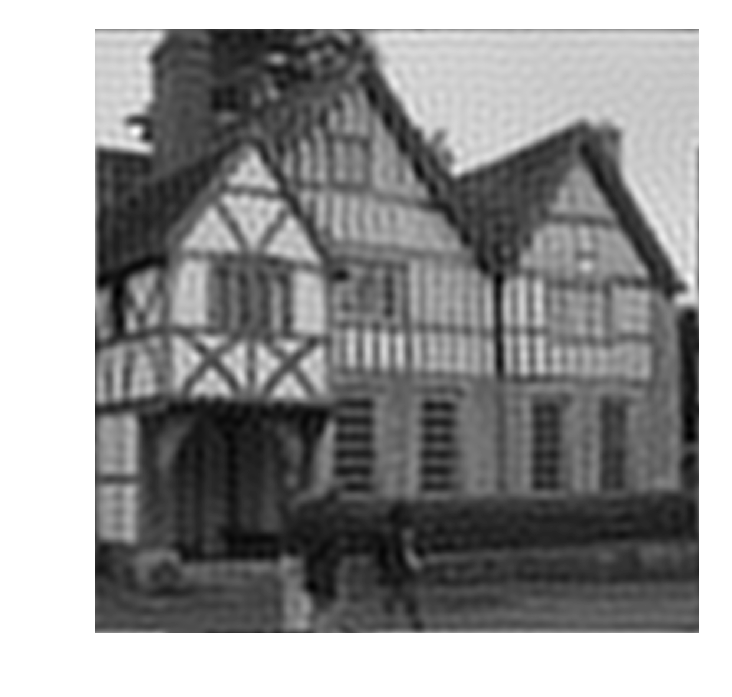

In [199]:
plt.imshow(image_deblurred,cmap='gray')
plt.axis('off')
plt.show()

When we throw out the lower values from the PSF, we are losing some information. In addition, it is typically impossible to know the PSF exactly.

.

Just for fun, here is the image plotted with cmap = 'prism' and 'flag'. These are obviously the most useful versions of the image.

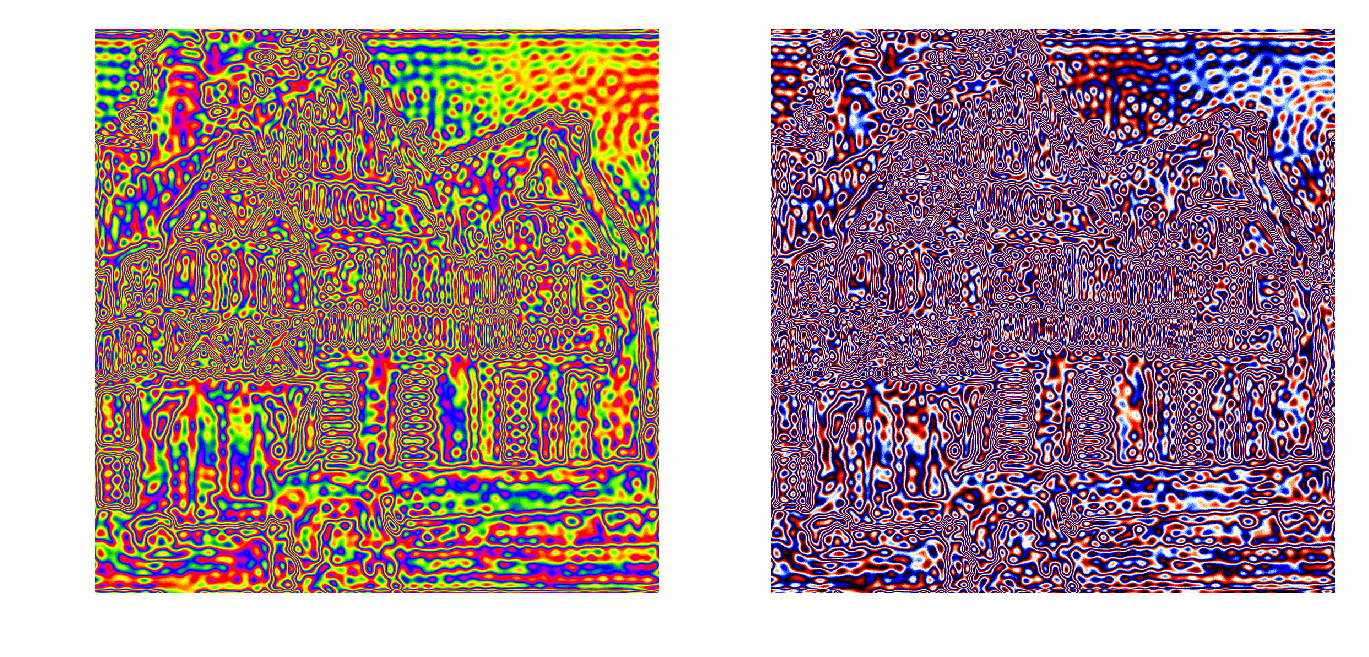

In [196]:
fig, (ax31,ax32) = plt.subplots(1,2,figsize=(8,4))
ax31.imshow(image_deblurred,cmap='prism')
ax31.axis('off')
ax32.imshow(image_deblurred,cmap='flag')
ax32.axis('off')
plt.show()